# Insurance Claim Fraud Detection 

<span style="color:green"> Saurav karki (08/17/024,Saturday) </span>

## Data Import

In [871]:
import pandas as pd 
import numpy as np

In [881]:
df0 = pd.read_csv("csv/fraud_insurance_claims.csv")
df0.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [882]:
df0.iloc[0]

months_as_customer                                  328
age                                                  48
policy_number                                    521585
policy_bind_date                    2014-10-17 00:00:00
policy_state                                         OH
policy_csl                                      250/500
policy_deductable                                  1000
policy_annual_premium                           1406.91
umbrella_limit                                        0
insured_zip                                      466132
insured_sex                                        MALE
insured_education_level                              MD
insured_occupation                         craft-repair
insured_hobbies                                sleeping
insured_relationship                            husband
capital-gains                                     53300
capital-loss                                          0
incident_date                       2015-01-25 0

## Data Exploration and Preprocessing

### Exploratory Data Analysis (EDA)

In this part I will be doing EDA which includes checking about the basic information about the data , <br>
knowing more about the dataset, checking the missing or null values present in the datasets.<br>
Visulizing the dataset in different way. This will help us to know about the more secret of the<br>
data set which will be hard to view through numbers only. After that Data cleaning, <br>
Handling the missing values, finding oultiers in the datasets and dealing with them<br>
Feature Engineering,<br>
Extracting the only useful columns from the datasets<br>
Encoding data and, <br>
Applying Normalization or Standardiztion to the data<br>

#### Basic Information

In [503]:
df0.shape

(1000, 39)

In [504]:
df0.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [505]:
categorical_data = df0.select_dtypes("object")
numerical_data = df0.select_dtypes("number")

In [506]:
print("Categorical Columns with data types :")
print(categorical_data.dtypes)
print(" ")
print("Numerial Columns with data types :")
print(numerical_data.dtypes)


Categorical Columns with data types :
policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object
 
Numerial Columns with data types :
months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
um

In [507]:
#checking missing values
categorical_data.isnull().sum()

policy_bind_date            0
policy_state                0
policy_csl                  0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
incident_date               0
incident_type               0
collision_type              0
incident_severity           0
authorities_contacted      91
incident_state              0
incident_city               0
incident_location           0
property_damage             0
police_report_available     0
auto_make                   0
auto_model                  0
fraud_reported              0
dtype: int64

In [508]:
numerical_data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
dtype: int64

In [509]:
# data info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [510]:
#checking for the duplicate values
df0.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [511]:
print("Total duplicate rows in dataset are : ",df0.duplicated().sum())

Total duplicate rows in dataset are :  0


#### Data visulization

In [512]:
#categorical data columns
categorical_data.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [513]:
#numerical data columns
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

##### Categorical Visulization

In [514]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_reported
N    753
Y    247
Name: count, dtype: int64


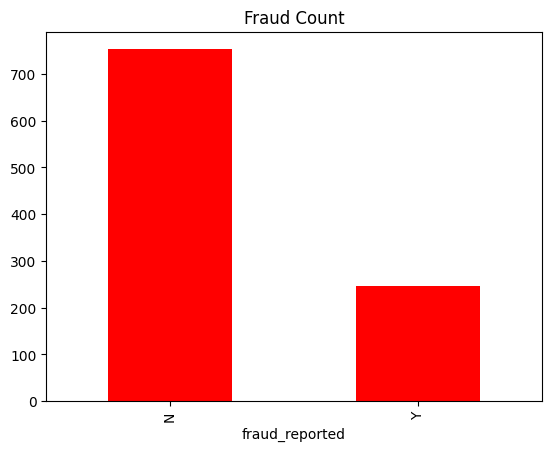

In [515]:
# sns.countplot(categorical_data['fraud_reported'].astype('category'),stat='count')
fraud_count = categorical_data['fraud_reported'].value_counts()
print(fraud_count)
fraud_count.plot(kind='bar', color='red', )  #plotting the bar diagram
plt.title("Fraud Count")
plt.show()

From this Bar chart we can know the ratio of fraud cases and valid cases in insurance claim. 
The number of classes (Y,N) values are very ranged from each other so this case is also known as Unbalanced Class. There are different ways to handle with this situation will look into it in further part.


<Axes: xlabel='insured_sex', ylabel='count'>

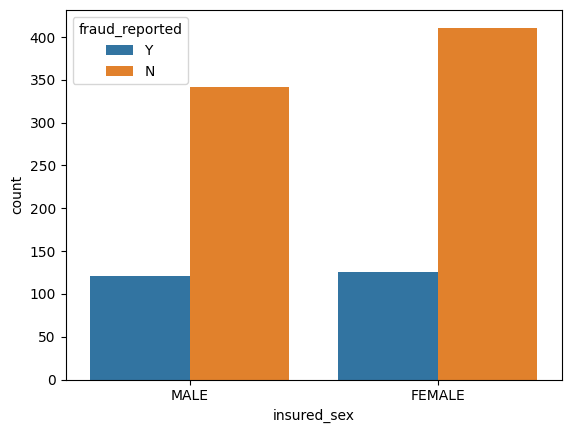

In [516]:
sns.countplot(categorical_data, x="insured_sex", hue="fraud_reported")


This is count plot of “insured_sex” column which show ths total number of Male and Female in the dataset and in “hue”  “fraud_reported” is added which will display the number of male and female have done fraud (Y/N) separately.

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


<Axes: ylabel='insured_education_level'>

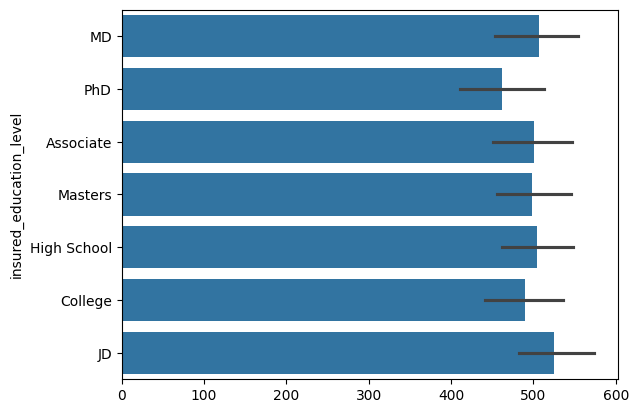

In [517]:
#bar plot
counter = categorical_data['insured_education_level'].value_counts()
print(counter)
sns.barplot(categorical_data['insured_education_level'],)



This plot shows the total number of users that have educations levels which are given.

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64


<Axes: xlabel='incident_type', ylabel='count'>

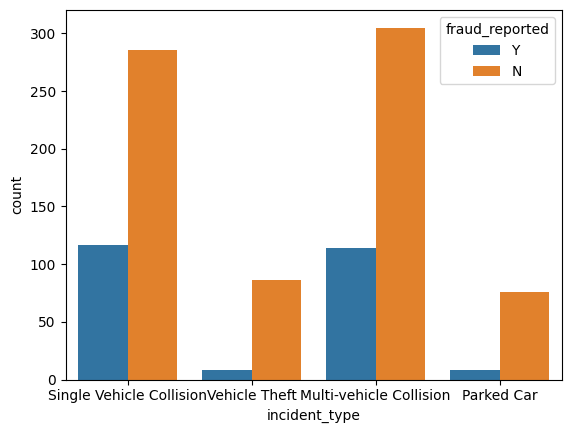

In [518]:
print(categorical_data['incident_type'].value_counts())
sns.countplot(categorical_data, x="incident_type", hue="fraud_reported")


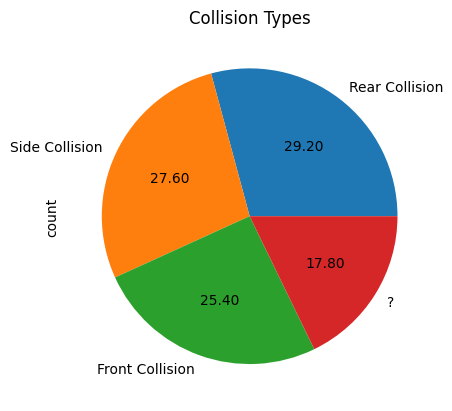

In [519]:
#pie chart
categorical_data['collision_type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Collision Types')
plt.show()

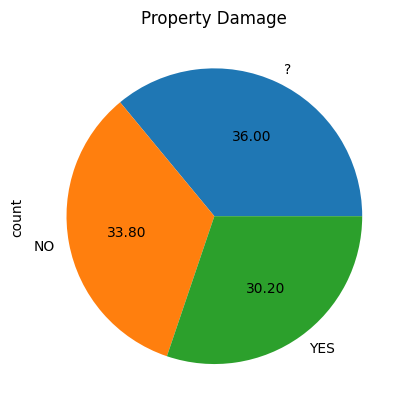

In [520]:
categorical_data['property_damage'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Property Damage')
plt.show()

These pie chart shows the total percentage that the class name has in the column and “?” is unknown type , we will try to fix that issue on further task.

In [521]:
#cross tab
pd.crosstab(categorical_data['fraud_reported'], categorical_data['police_report_available'])

police_report_available,?,NO,YES
fraud_reported,,,
N,254,257,242
Y,89,86,72


This  is a simple data visualization in tabular format which shows the total number related to the classes with the categorical data.

incident_severity  Major Damage  Minor Damage  Total Loss  Trivial Damage
fraud_reported                                                           
N                           109           316         244              84
Y                           167            38          36               6


<Axes: xlabel='incident_severity', ylabel='fraud_reported'>

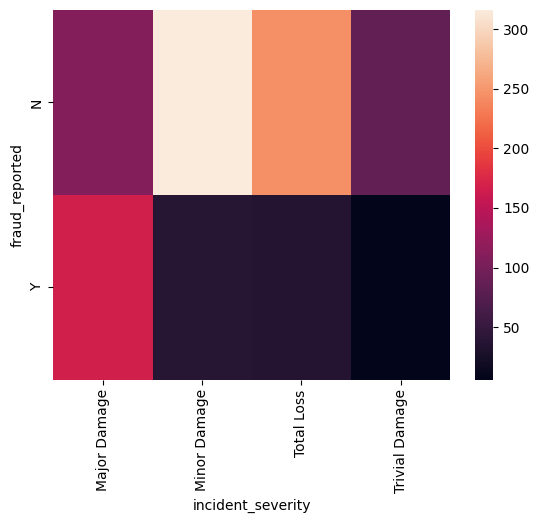

In [522]:
# categorical heatmap
print(pd.crosstab(categorical_data['fraud_reported'], categorical_data['incident_severity']))
sns.heatmap(pd.crosstab(categorical_data['fraud_reported'], categorical_data['incident_severity']))

This heatmap shows the relationship between 2 different columns (incident_serverity and fraud_reported) along with the total amount of data in that class. The darkest part of the heat map shows the smaller number of data falls on that class and lighter part of the heat map shows the highest number of data falls on that class.

##### Numerical Visulization

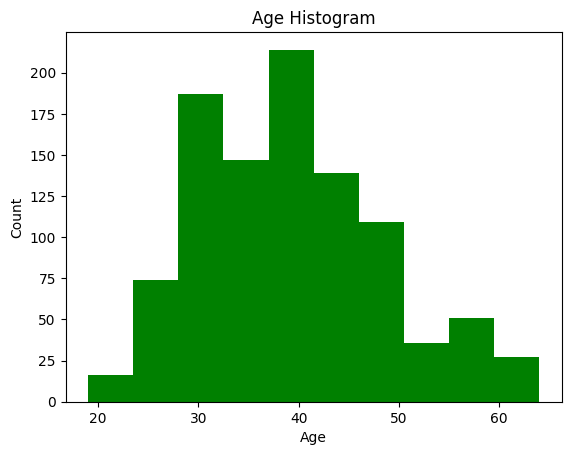

In [523]:
plt.hist(numerical_data['age'], color='g')
plt.xlabel("Age")     
plt.ylabel("Count")
plt.title("Age Histogram")
plt.show()               



In [524]:
This is histogram plot, this chart shows the age group and its count as well as it shows the maximum number of ages in the dataset. We can also know that the minimum age and maximum age group and many more.

SyntaxError: invalid syntax (103308420.py, line 1)

<Axes: xlabel='age'>

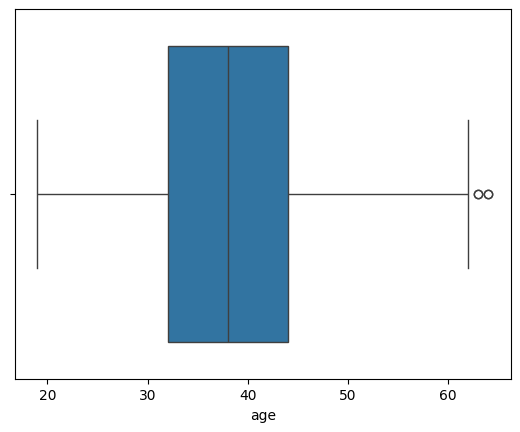

In [525]:
#box plot
sns.boxplot(numerical_data['age'],orient='h')

<Axes: xlabel='vehicle_claim'>

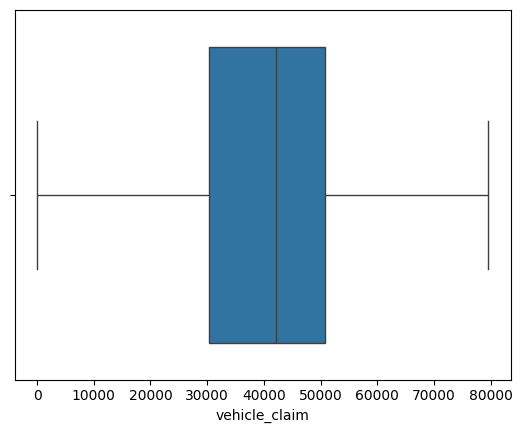

In [526]:
sns.boxplot(numerical_data['vehicle_claim'],orient='h')

Box plot tells us about various things of the column like IQR, Median and also about outliers in the data.
Outliers are those data points that are very un similar to the rest of the maximum data points of that column.
In first box plot there are some dots outside the line which are outliers, and in second box plot there are no outliers.


<Axes: xlabel='total_claim_amount', ylabel='age'>

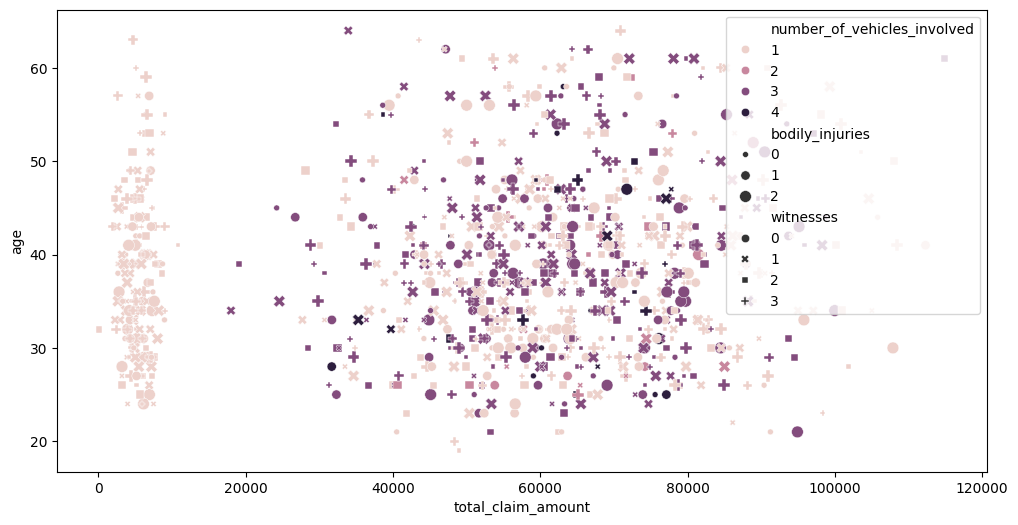

In [527]:
# numerical 
#multivariate (five columns)
plt.figure(figsize=(12,6))
sns.scatterplot(x=numerical_data['total_claim_amount'],y=numerical_data['age'], hue=numerical_data['number_of_vehicles_involved'],
                style=numerical_data['witnesses'], size =numerical_data['bodily_injuries'] )


The shown plot is known as scatter plot. In the above figure there are 5 columns involved and lots of hidden messages are visible now. Such as must of people get the insurance between 20,000 to 100,000, people who got least insurance in their case only single vehicles was involve, only one people of age round 60 got the highest insurance even that person doesn’t have more body injuries, but witnesses and number of vehicles involved were high and many more data can be gathered from above chart. 

##### Numerical-Categorical Visulization

<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

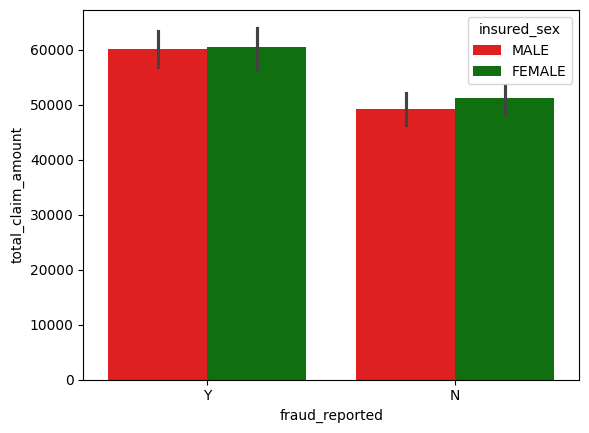

In [528]:
sns.barplot(x=categorical_data['fraud_reported'], y=numerical_data['total_claim_amount'] ,
            palette=['red','green'], hue=categorical_data['insured_sex'])

Above bar plot shows the total amount of insurance claimed by the user based on  fraud and not fraud along with the  involvement of Male and Female.

<Axes: xlabel='total_claim_amount', ylabel='insured_sex'>

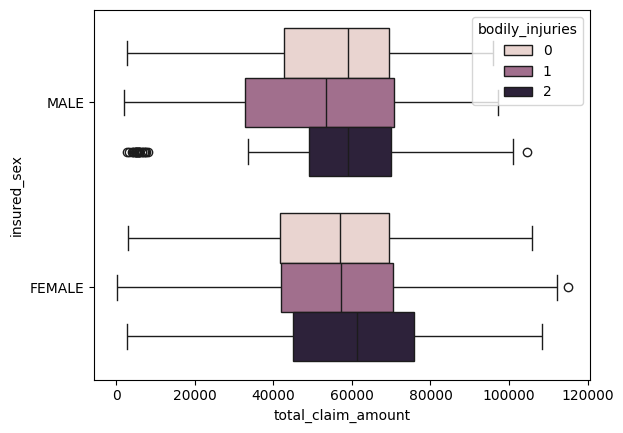

In [529]:
sns.boxplot(x=numerical_data['total_claim_amount'],y=categorical_data['insured_sex'], hue=numerical_data['bodily_injuries'])

From the above box plots lots of outliers can be classified based on the different factor like “insured_sex”, “bodily_injuries” and “total_claim_amount” columns.

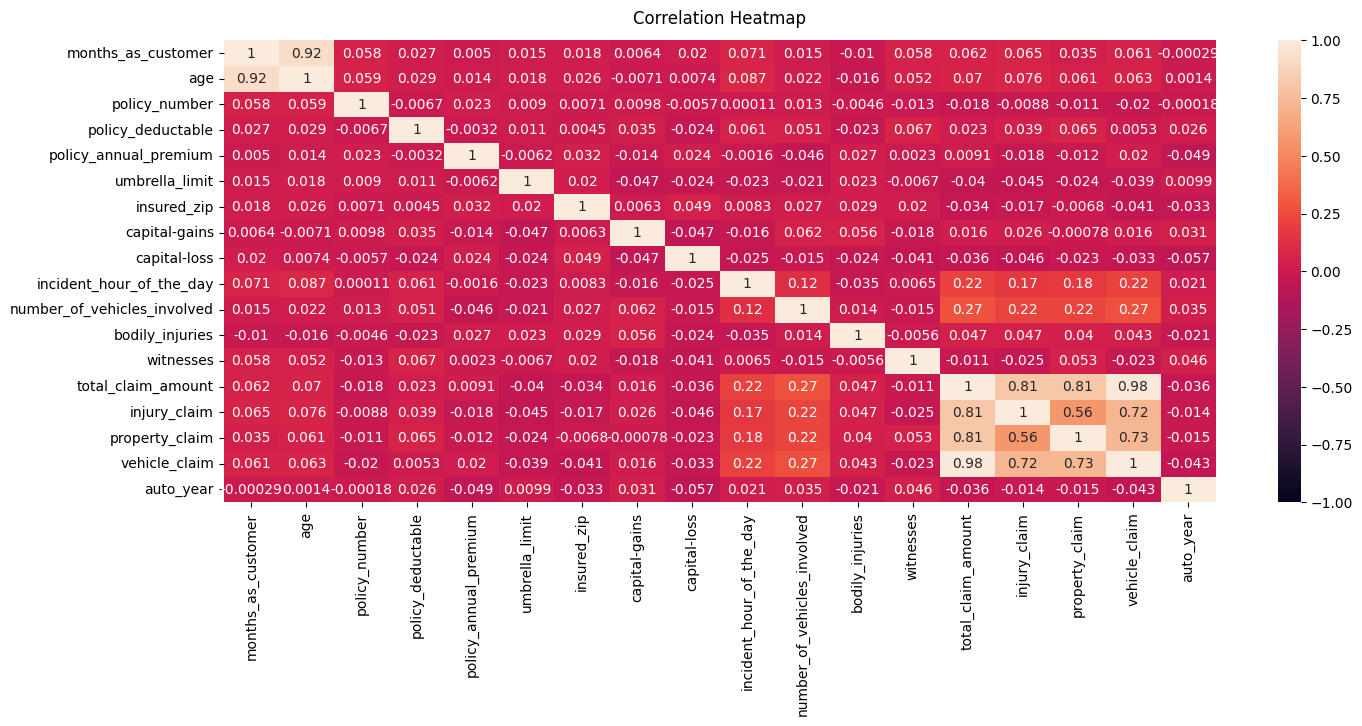

In [530]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From above correlation heatmap we can identify the relationship between each column with every other column. Value 1 means fully dependent and value towards one is strongly dependent and vice versa for (-ve) side.

### Data Cleaning

#### Handling Missing Values

In [531]:
# checking for missing values 
total_missing_values = 0

for col in df0.columns:
    col_missing_value = df0[col].isnull().sum()
    if col_missing_value >0:
        print(f"Total missing value on {col} is : ",col_missing_value)
    else:
       pass
    total_missing_values += col_missing_value

print("Total Missing : ", total_missing_values)

Total missing value on authorities_contacted is :  91
Total Missing :  91


In [532]:
df0['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

There is only one column “authorities_contacted” has missing value (91) this missing value is filled by “ffill” method. “ffill” method fill the missing value place with the valid value above its row.

In [533]:
df0.shape

(1000, 39)

In [534]:
#filling the null value with ffill method
df0['authorities_contacted'].ffill(inplace=True)


C:\Users\Saurav Karki\AppData\Local\Temp\ipykernel_13868\2622000027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df0['authorities_contacted'].ffill(inplace=True)


In [535]:
#checking again
total_missing_values = 0

for col in df0.columns:
    col_missing_value = df0[col].isnull().sum()
    if col_missing_value >0:
        print(f"Total missing value on {col} is : ",col_missing_value)
    else:
       pass
    total_missing_values += col_missing_value

print("Total Missing : ", total_missing_values)

Total Missing :  0


In [536]:
df0['authorities_contacted'].unique()

array(['Police', 'Fire', 'Other', 'Ambulance'], dtype=object)

#### Handling Outlier

In [537]:
# finding outlier for total_claim_amount
sorted_total_claim_amount =  np.sort(df0['total_claim_amount'])



#applying IQR
Q1 = np.percentile(sorted_total_claim_amount, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_total_claim_amount, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_total_claim_amount, 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q2 50 percentile of the given data is, ', Q2)
print('Q3 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  41775.0
Q2 50 percentile of the given data is,  58055.0
Q3 75 percentile of the given data is,  70595.0
Interquartile range is 28820.0


In [538]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


low_limit is -1455.0
up_limit is 113825.0


For calculating outliers by IQR method we have to find Q1,Q2 and Q3, by this we can find the IQR value. After that calculating the low limit and higher limit of the data. Any data point lies out of the limit is known as outliers. 
<br><br>
For this project I am finding outlier on only one column which I think is matters, but for practice many outliers can be removed.


In [539]:
outlier =[]
for x in sorted_total_claim_amount:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [114920]


<Axes: >

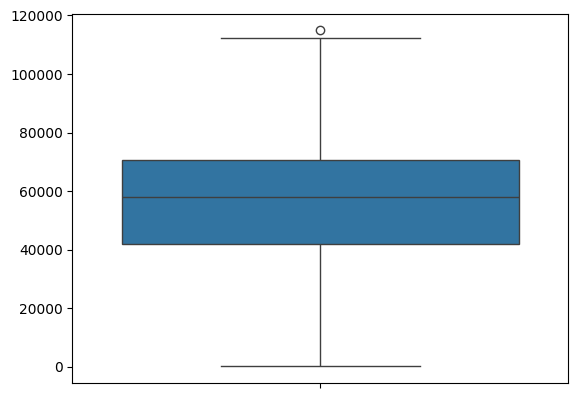

In [540]:
sns.boxplot(sorted_total_claim_amount)

In [541]:
#removing the outlier 
df0 = df0.drop(df0[df0['total_claim_amount'] == 114920].index)


<Axes: ylabel='total_claim_amount'>

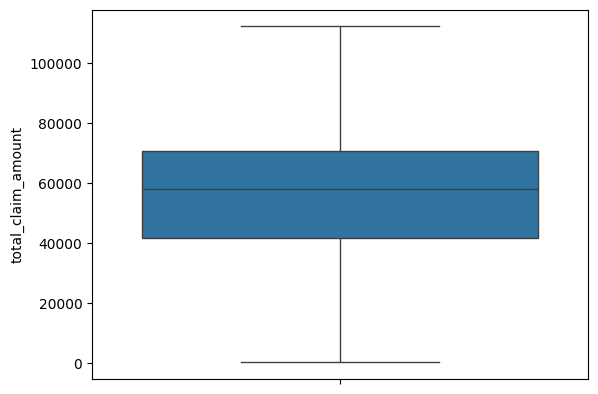

In [542]:
sns.boxplot(df0['total_claim_amount'])

Since there is only one outlier , I removed it manually but for multiple outliers loop or can be handle in single function.

#### Handling Other Data cleaning

In [543]:
df0['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    301
Name: count, dtype: int64

In [544]:
df0['police_report_available'].value_counts()


police_report_available
?      343
NO     343
YES    313
Name: count, dtype: int64

In [545]:
# "?" can be missing value or other value so teating this as a diffenent class will be better
df0['property_damage'] = df0['property_damage'].replace('?', 'Unknown')
df0['police_report_available'] = df0['police_report_available'].replace('?', 'Unknown')
df0['collision_type'] = df0['collision_type'].replace('?', 'Unknown')


In [546]:
print(df0['property_damage'].value_counts())

print(df0['police_report_available'].value_counts())

property_damage
Unknown    360
NO         338
YES        301
Name: count, dtype: int64
police_report_available
Unknown    343
NO         343
YES        313
Name: count, dtype: int64


The number of “?” classes in both columns are higher so dropping them will not be better solution, “?” can be missing value or value which data is not collected or any reason might be possible so treating it as a new class “unknown” would be better solution.

### Feature Engineering

##### Extracting Features from Dates


In [547]:
#extracting feature from date 
#splitting date to months days because in dome month or specific day or specific year most accident can occers

df0['incident_date'] = pd.to_datetime(df0['incident_date'])

# Extracting features
df0['incident_year'] = df0['incident_date'].dt.year
df0['incident_month'] = df0['incident_date'].dt.month
df0['incident_day'] = df0['incident_date'].dt.day
df0['incident_day_of_week'] = df0['incident_date'].dt.dayofweek
df0['incident_week_of_year'] = df0['incident_date'].dt.isocalendar().week
df0['incident_quarter'] = df0['incident_date'].dt.quarter


In [548]:
df0.shape

(999, 45)

In [549]:
df0.drop("incident_date", axis=1, inplace=True)

In [550]:
df0.shape

(999, 44)

##### 	Encode Categorical Variables (one hot encoding / label encoding)

**label encoding** <br>
 insured_sex <br>
 incident_severity <br>
 fraud_reported
 <br>






In [874]:
#importing library for label encoder
from sklearn.preprocessing import LabelEncoder

In [876]:
encoder_insured_sex = LabelEncoder()
encoder_incident_severity = LabelEncoder()
encoder_fraud_reported = LabelEncoder()

In [877]:
df0['insured_sex'] = encoder_insured_sex.fit_transform(df0['insured_sex'])
df0['incident_severity'] = encoder_incident_severity.fit_transform(df0['incident_severity'])
df0['fraud_reported'] = encoder_fraud_reported.fit_transform(df0['fraud_reported'])

print("Label Encoding Successful")

Label Encoding Successful


**one hot encoding** <br>
 property_damage <br>
 police_report_available <br>
 policy_state <br>
 collision_type <br>


In [554]:
from sklearn.preprocessing import OneHotEncoder

In [555]:
new_cat_cols = df0[["property_damage","police_report_available","policy_state","collision_type"]]
new_cat_cols.head(1)

,property_damage,police_report_available,policy_state,collision_type
0,YES,YES,OH,Side Collision


In [556]:
#Initialize OneHotEncoder
ohe = OneHotEncoder()
data = ohe.fit_transform(new_cat_cols)
df1 = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
print("One Hot Encoding Successful")

One Hot Encoding Successful


In [557]:
df1.head()

,property_damage_NO,property_damage_Unknown,property_damage_YES,police_report_available_NO,police_report_available_Unknown,police_report_available_YES,policy_state_IL,policy_state_IN,policy_state_OH,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown
0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1


Doing One Hot Encoding (OHE) will create a new Data frame with the column we have provided to encode. For OHE I have only used some columns that I think is necessary.

In [558]:
df2 = pd.concat([df0,df1], axis =1)

In [560]:
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available_NO,police_report_available_Unknown,police_report_available_YES,policy_state_IL,policy_state_IN,policy_state_OH,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown
0,328.0,48.0,521585.0,2014-10-17 00:00:00,OH,250/500,1000.0,1406.91,0.0,466132.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,228.0,42.0,342868.0,2006-06-27 00:00:00,IN,250/500,2000.0,1197.22,5000000.0,468176.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,134.0,29.0,687698.0,2000-09-06 00:00:00,OH,100/300,2000.0,1413.14,5000000.0,430632.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,256.0,41.0,227811.0,1990-05-25 00:00:00,IL,250/500,2000.0,1415.74,6000000.0,608117.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,228.0,44.0,367455.0,2014-06-06 00:00:00,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,285.0,41.0,186934.0,2014-01-05 00:00:00,IL,100/300,1000.0,1436.79,0.0,608177.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,130.0,34.0,918516.0,2003-02-17 00:00:00,OH,250/500,500.0,1383.49,3000000.0,442797.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,458.0,62.0,533940.0,2011-11-18 00:00:00,IL,500/1000,2000.0,1356.92,5000000.0,441714.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999,456.0,60.0,556080.0,1996-11-11 00:00:00,OH,250/500,1000.0,766.19,0.0,612260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
df2 = df2.drop(11)

<br>
After that I have created a new data frame “df2” by concatenating “df0 and df1” which now makes the total of 57 different columns,
<br><br>
Note: I haven’t use all the categorical columns for encoding because I will remove the columns that will not effectively contribute to prediction.


##### 	Normalize/Standardize Features

I have used the Standardization method which I think is suitable for my numerical data because some of columns are wide ranges and have higher value compared to others.  This method will make the mean value of columns to 0 and standard deviation to 1 which makes all the values of the column are around 0. This helps models to improve accuracy of prediction.

**Important Numerical Columns**

total_claim_amount  ===> (standardization) <br>
number_of_vehicles_involved  <br>
bodily_injuries <br>
witnesses <br>
policy_deductable  ===>  (standardization) <br>
injury_claim  ===>  (standardization) <br>
property_claim   ===> (standardization) <br>
vehicle_claim   ===> (standardization) <br>
incident_hour_of_the_day <br>
age  ===>  (standardization) <br>

In [562]:
from sklearn.preprocessing import StandardScaler

In [563]:
scaler = StandardScaler()

In [564]:
#creating a new dataframe that includes column that needs to scale
numerical_scale_df = df2[["months_as_customer","total_claim_amount","policy_deductable", "injury_claim","property_claim","vehicle_claim", "age"]]



In [565]:
df_standardized = scaler.fit_transform(numerical_scale_df)



In [566]:
# Convert the standardized array to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=["scaled_months_as_customer","scaled_total_claim_amount",
                "scaled_policy_deductable", "scaled_injury_claim","scaled_property_claim","scaled_vehicle_claim", "scaled_age"])

# Display the DataFrame
df_standardized.head()

,scaled_months_as_customer,scaled_total_claim_amount,scaled_policy_deductable,scaled_injury_claim,scaled_property_claim,scaled_vehicle_claim,scaled_age
0,1.082133,0.718254,-0.221079,-0.187502,1.169719,0.753320,0.995664
1,0.211476,-1.809082,1.414905,-1.364054,-1.373003,-1.824675,0.337306
2,-0.606941,-0.685568,1.414905,0.056843,-0.735245,-0.784878,-1.089134
3,0.455260,0.406420,1.414905,-0.222408,-0.217976,0.681134,0.227580
4,0.211476,-1.754768,-0.221079,-1.257281,-1.400009,-1.769474,0.556759


Here, initially I have created a new data frame that holds the columns which need to be scaled. After that I have convent the data frame columns into scaled column and stored in a new data frame adding “scaled_” in front of column names. 

In [567]:
# joining standardized dataframe with main dataframe

df2 = pd.concat([df2,df_standardized], axis =1)

In [568]:
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown,scaled_months_as_customer,scaled_total_claim_amount,scaled_policy_deductable,scaled_injury_claim,scaled_property_claim,scaled_vehicle_claim,scaled_age
0,328.0,48.0,521585.0,2014-10-17 00:00:00,OH,250/500,1000.0,1406.91,0.0,466132.0,...,0.0,1.0,0.0,1.082133,0.718254,-0.221079,-0.187502,1.169719,0.753320,0.995664
1,228.0,42.0,342868.0,2006-06-27 00:00:00,IN,250/500,2000.0,1197.22,5000000.0,468176.0,...,0.0,0.0,1.0,0.211476,-1.809082,1.414905,-1.364054,-1.373003,-1.824675,0.337306
2,134.0,29.0,687698.0,2000-09-06 00:00:00,OH,100/300,2000.0,1413.14,5000000.0,430632.0,...,1.0,0.0,0.0,-0.606941,-0.685568,1.414905,0.056843,-0.735245,-0.784878,-1.089134
3,256.0,41.0,227811.0,1990-05-25 00:00:00,IL,250/500,2000.0,1415.74,6000000.0,608117.0,...,0.0,0.0,0.0,0.455260,0.406420,1.414905,-0.222408,-0.217976,0.681134,0.227580
4,228.0,44.0,367455.0,2014-06-06 00:00:00,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,...,0.0,0.0,1.0,0.211476,-1.754768,-0.221079,-1.257281,-1.400009,-1.769474,0.556759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,285.0,41.0,186934.0,2014-01-05 00:00:00,IL,100/300,1000.0,1436.79,0.0,608177.0,...,0.0,1.0,0.0,-0.641767,0.562147,-1.039071,0.015777,0.023001,0.775613,-0.540503
997,130.0,34.0,918516.0,2003-02-17 00:00:00,OH,250/500,500.0,1383.49,3000000.0,442797.0,...,1.0,0.0,0.0,2.213987,-0.217248,1.414905,-0.452380,-0.450643,-0.071511,2.531831
998,458.0,62.0,533940.0,2011-11-18 00:00:00,IL,500/1000,2000.0,1356.92,5000000.0,441714.0,...,0.0,0.0,1.0,2.196574,-1.809462,-0.221079,-1.429760,-1.343920,-1.815652,2.312378
999,456.0,60.0,556080.0,1996-11-11 00:00:00,OH,250/500,1000.0,766.19,0.0,612260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [569]:
df2 = df2.drop(11)

In [570]:
#droping columns
df2.drop(columns=["months_as_customer","total_claim_amount","policy_deductable", "injury_claim","property_claim","vehicle_claim", "age"], inplace=True)


In [571]:
df2.shape

(999, 57)

 I have removed the columns that are scaled from the main table which are no use in further process

### Feature Selection

In [573]:
#first removing the columns that are encoded using OHE
df2 = df2.drop(columns=["property_damage","police_report_available","policy_state","collision_type"],axis=1)
#dropping the other column that have direct no connection with the target
df2 = df2.drop(columns=['policy_bind_date','policy_csl',], axis=1)

df2 = df2.drop(columns=['insured_sex','insured_education_level','insured_occupation','insured_hobbies',
                  'insured_relationship',  'incident_type',
                  'incident_city', 'incident_location','authorities_contacted',
                   'auto_make', 'auto_model'], axis =1 )



In [575]:

df2 = df2.drop('incident_state', axis =1)


In [589]:
# for numerical columns
df2 = df2.drop(columns=['policy_number', 
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss','auto_year' ], axis =1 )

In [590]:
df2.shape

(999, 32)

I have removed columns form both numerical and categorical type which was OHE with new columns, columns that are not related and columns that doesn’t help to increase the performance according to me.  <br><br>
Note: I’ll try to perform RFE method of feature selection while model training.


## Model Building

### Train Test Split

In [591]:
from sklearn.model_selection import train_test_split

In [609]:
df_main = df2.copy()

#droping column 999 because it contains null values 
df_main = df_main.drop(999)

In [610]:
X = df_main.drop("fraud_reported", axis =1)

In [611]:
y = df_main['fraud_reported']

In [612]:
#applying train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [613]:
print(X_train.shape)
print(X_test.shape)


(798, 31)
(200, 31)


In this process data is divided into two-part training and testing. “test_size” refers to the ratio in which the data is divided. For example, if the ratio is 0.2 this means 80% of data is for training and 20% of data is for testing. 

### Model Training

#### Using scikit learn

##### Perceptron

In [635]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

In [764]:
pc = Perceptron() 

In [765]:
pc.fit(X_train,y_train)

Perceptron()

In [766]:
y_pred_pc = pc.predict(X_test)

In [794]:
acc_pc = accuracy_score(y_pred_pc,y_test)
acc_pc

0.735

In [768]:
cm_pc = pd.DataFrame(confusion_matrix(y_pred_pc,y_test))
cm_pc

,0,1
0,147,53
1,0,0


This confusion matrix have Type 1 error 

In [769]:
precision_score(y_test, y_pred_pc, average='weighted')

D:\Applications\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.540225

In [770]:
f1_score(y_test, y_pred_lgr, average='weighted')

0.7745252355434136

##### Logistic Regression

In [743]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score

In [771]:
lgr = LogisticRegression()

In [772]:
lgr.fit(X_train,y_train)

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [773]:
y_pred_lgr = lgr.predict(X_test)

In [793]:
acc_lgr =accuracy_score(y_pred_lgr,y_test)
acc_lgr

0.765

In [775]:
cm_lgr = pd.DataFrame(confusion_matrix(y_test,y_pred_lgr))
cm_lgr

,0,1
0,128,19
1,28,25


In [776]:
precision_score(y_test, y_pred_lgr, average='weighted')

0.753645104895105

In [777]:
f1_score(y_test, y_pred_lgr, average='weighted')


0.7575880371542308

##### Better Model (check 1)

<span style="color:orange">From the result of metrices the better performing model is Logistic regression.</span>

### Model Tuning

#### Hyperparameter Tuning

##### RandomSearchCV

In [779]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [795]:
param_dist_pc = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'alpha': uniform(loc=0.0001, scale=0.01),  
    'max_iter': [100, 200, 500, 1000, 2000, 5000],  
    'class_weight': ['balanced', None],  
    'fit_intercept': [True, False],  
    'eta0': uniform(loc=0.01, scale=1),  
    'shuffle': [True, False], 
}

param_dist_lgr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0.01, scale=100),
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced','weighted' ,None],
    'max_iter': [100, 200, 500, 1000, 2000,5000]  
}


In [796]:
#initilizing 

#for perceptron
random_search_pc = RandomizedSearchCV(pc, param_distributions=param_dist_pc, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

#for logistic regression
random_search_lgr = RandomizedSearchCV(lgr, param_distributions=param_dist_lgr, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)


In [797]:
# training the model

#perceptron
random_search_pc.fit(X_train, y_train)

#logistic
random_search_lgr.fit(X_train, y_train)

D:\Applications\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Applications\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Applications\Python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Applications\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Applications\Python\Lib\site-packages\sklearn\

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000028AB077C9B0>,
                                        'class_weight': ['balanced', 'weighted',
                                                         None],
                                        'max_iter': [100, 200, 500, 1000, 2000,
                                                     5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

##### GridSearchCV

In [798]:
from sklearn.model_selection import GridSearchCV

In [802]:
param_grid_lgr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced','weighted' ,None],
    'max_iter': [100, 200, 500, 1000, 2000,5000]  
}

In [803]:
grid_search_lgr = GridSearchCV(lgr, param_grid_lgr, cv=5, scoring='accuracy', n_jobs=-1)


In [804]:
grid_search_lgr.fit(X_train, y_train)

D:\Applications\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Applications\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Applications\Python\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'weighted', None],
                         'max_iter': [100, 200, 500, 1000, 2000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [806]:
print("Best Parameters:", grid_search_lgr.best_params_)
print("Best Score:", grid_search_lgr.best_score_)

Best Parameters: {'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7844811320754717


##### Better Model (final check)

In [810]:
print("")
print("For Percetprton Model")
print("")
print("-- Without Hyperparameter Tuining --")
print("")
print("Accuracy Score :", acc_pc)
print("")
print("-- With Hyperparameter Tuining --")
print("")
print("--> RandomizedSearch")
print("")
print("Best Parameters for Perceptron:", random_search_pc.best_params_)
print("Best Score for Perceptron:", random_search_pc.best_score_)



For Percetprton Model

-- Without Hyperparameter Tuining --

Accuracy Score : 0.735

-- With Hyperparameter Tuining --

--> RandomizedSearch

Best Parameters for Perceptron: {'alpha': 0.006463326181858954, 'class_weight': None, 'eta0': 0.2539896433790836, 'fit_intercept': False, 'max_iter': 5000, 'penalty': 'l1', 'shuffle': True}
Best Score for Perceptron: 0.7581446540880503


In [815]:
print("")
print("For Logistic Regression Model")
print("")
print("-- Without Hyperparameter Tuining --")
print("")
print("Accuracy Score :", acc_lgr)
print("")
print("-- With Hyperparameter Tuining --")
print("")
print("--> RandomizedSearch")
print("")
print("Best Parameters for Logistic Regression:", random_search_lgr.best_params_)
print("Best Score for Logistic Regression:", random_search_lgr.best_score_)
print("")
print("--> GridSearch")
print("")
print("Best Parameters for logistic regression:", grid_search_lgr.best_params_)
print("Best Score for logistic regression:", grid_search_lgr.best_score_)



For Logistic Regression Model

-- Without Hyperparameter Tuining --

Accuracy Score : 0.765

-- With Hyperparameter Tuining --

--> RandomizedSearch

Best Parameters for Logistic Regression: {'C': 97.38555188414593, 'class_weight': None, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.7794732704402516

--> GridSearch

Best Parameters for logistic regression: {'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for logistic regression: 0.7844811320754717


#### Model Updating

##### Perceptron Updated

In [822]:
#perceptron updated
# 'alpha': 0.006463326181858954, 'class_weight': None, 'eta0': 0.2539896433790836, 'fit_intercept': False, 'max_iter': 5000, 'penalty': 'l1', 'shuffle': True
pc_u = Perceptron(alpha=0.006463326181858954,class_weight=None, max_iter=5000, penalty='l1', fit_intercept=False, shuffle=True, eta0=0.2539)
pc_u.fit(X_train,y_train)



Perceptron(alpha=0.006463326181858954, eta0=0.2539, fit_intercept=False,
           max_iter=5000, penalty='l1')

In [823]:
y_pred_pcu = pc_u.predict(X_test)
accuracy_score(y_pred_pcu, y_test)

0.735

##### Logistic Regression Updated

In [819]:
# logistic regression updated
lgr_u = LogisticRegression(class_weight=None, max_iter=100, penalty='l1', solver='liblinear')
lgr_u.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [820]:
y_pred_lgru = lgr_u.predict(X_test)
accuracy_score(y_pred_lgru, y_test)

0.78

In [821]:
pd.DataFrame(confusion_matrix(y_pred_lgru, y_test))

,0,1
0,130,27
1,17,26


### Exporting

In [843]:

for cols in X_train.columns:
    print("Input field is --->  ", cols)

Input field is --->   incident_severity
Input field is --->   incident_hour_of_the_day
Input field is --->   number_of_vehicles_involved
Input field is --->   bodily_injuries
Input field is --->   witnesses
Input field is --->   incident_year
Input field is --->   incident_month
Input field is --->   incident_day
Input field is --->   incident_day_of_week
Input field is --->   incident_week_of_year
Input field is --->   incident_quarter
Input field is --->   property_damage_NO
Input field is --->   property_damage_Unknown
Input field is --->   property_damage_YES
Input field is --->   police_report_available_NO
Input field is --->   police_report_available_Unknown
Input field is --->   police_report_available_YES
Input field is --->   policy_state_IL
Input field is --->   policy_state_IN
Input field is --->   policy_state_OH
Input field is --->   collision_type_Front Collision
Input field is --->   collision_type_Rear Collision
Input field is --->   collision_type_Side Collision
Input 

In [846]:
import joblib

In [847]:
#logistic regression model
joblib.dump(lgr_u, 'logisticRegression.pkl')

['logisticRegression.pkl']

In [879]:
# Label encoder

joblib.dump(encoder_incident_severity, 'encoder_incident_severity.pkl')


['encoder_incident_severity.pkl']

In [849]:
# One hot encoder
joblib.dump(ohe, "OneHotEncoder.pkl")


['OneHotEncoder.pkl']

In [850]:
# StandardScaler
joblib.dump(scaler, "StandardScaler.pkl")


['StandardScaler.pkl']

In [ ]:
#logistic accuracy

# See You Soon 👋